In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import copy

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings("ignore")

* [Quadratic Discriminant Analysis](#Quadratic-Discriminant-Analysis)
* [K-Nearest Neighbors](#K-Nearest-Neighbors)
* [A Comparison of Classification Methods](#A-Comparison-of-Classification-Methods)
* [Example: the Stock Market Data](#Example:-the-Stock-Market-Data)
    * [Logistic Regression](#Logistic-Regression)
    * [Linear Discriminant Analysis](#Linear-Discriminant-Analysis-(LDA))
    * [Quadratic Discriminant Analysis](#Quadratic-Discriminant-Analysis-(QDA))
    * [K-Nearest Neighbors](#K-Nearest-Neighbors-(KNN))
        * [KNN with K=1](#KNN-with-K=1)
        * [KNN with K=3](#KNN-with-K=3)

# Quadratic Discriminant Analysis

Quadratic Discriminant Analysis (QDA) assumes that each class has its own covariance matrix. In other words, let $\Sigma_k $ denote a covariance matrix for the $k$th class. Then, QDA assumes that an observation from the $k$th class is of the form $X \sim N(\mu_k ,\Sigma_k )$. Under this assumption, the Bayes classifier assigns an
observation $X = x$ to the class for which
$$\delta_k (x) =-\frac{1}{2}x^T \Sigma^{-1}_{k}x + x^T \Sigma^{-1}_{k} \mu_k -\frac{1}{2} \mu_{k}^T \Sigma^{-1}_{k}\mu_{k}-\frac{1}{2} \log|\Sigma_k | + \log \pi_k $$
is largest. 

Basically, the QDA classifier involves plugging estimates for $\Sigma_{k}$ , $\mu_{k}$, and $\pi_k$ into the above equation, and then assigning an observation $X = x$ to the class for which this quantity is largest.

# K-Nearest Neighbors

Let  $K$ be a positive integer, and assume that a test observation $x_0$ is given. Then, first, $K$ points in the training data, that are closest to $x_0$, are identified by the KNN classifier. Let $\mathcal{N}_0$ represent these points. KNN then approximates the conditional probability for class $j$ as the fraction of points in $\mathcal{N}_0$ whose response values equal $j$. In other words,

$$Pr(Y = j|X = x_0 ) =\dfrac{1}{K}\sum_{i \in \mathcal{N}_0} I(y_i = j). $$

Finally, KNN applies Bayes rule and classifies the test observation $x_0$ to the class with the largest probability.

# A Comparison of Classification Methods

Both logistic regression and LDA produce linear decision boundaries. However, the main difference lies in the fact that their coefficients are estimated using maximum likelihood and the estimated mean and variance from a normal distribution, respectively. We can expect that the two approaches provide similar results; however, in some cases, the results might differ.

Assuming that the observations are drawn from a Gaussian distribution with a common covariance matrix, LDA can provide better results than logistic regression. However, if these assumptions are not met, logistic regression can provide better results.

On the other hand, KKN takes a non-parametric approach where no assumptions are made about the shape of the decision boundary. It is expected KNN to provide better results than LDA and logistic regression if the decision boundary is highly non-linear. The main shortcoming of KKN is that it does not tell us which predictors are important.

Furthermore, QDA assumes a quadratic decision boundary and it can provide accurate models for a wider range of problems than those of linear methods.

In general, no method can dominate others in every situation. The linear regression approaches, LDA and logistic, tend to perform well if the true decision boundaries are linear. However, for non-linear boundaries, QDA may give better results.
A non-parametric approach, such as KNN, can be superior, for a more complicated decision boundary given the level of smoothness for a non-parametric approach is chosen perfectly.

Here, we have briefly compared some of the popular classification methods from the textbook. For a full comparison, see [*An Introduction to Statistical Learning*](https://link.springer.com/book/10.1007/978-1-4614-7138-7).

# Example: the Stock Market Data

Here, we are using the **Smarket** data which is part of the **ISLR** R-library. This data set consists of
percentage returns for the S&P 500 stock index over a period of 1,250 days (from the
beginning of 2001 until the end of 2005). The percentage returns for each of the five previous trading days are recorded for each date. 

| Predictor | Explanation |
|-----------|---------------------------------------------------------------|
| Lag# | # day(s) ago |
| Volume | the number of shares traded on the previous day (in billions) |
| Today | the percentage return on the date in question |
| Direction | whether the market was Up or Down on this date |

In [2]:
df = pd.read_csv('Data/Smarket.csv', index_col=0, parse_dates=True)
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
df.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


Text(0, 0.5, 'Volume')

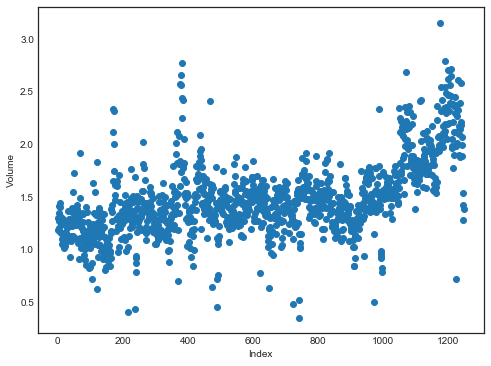

In [4]:
plt.figure(figsize = (8, 6))
plt.scatter(list(range(len(df['Volume']))),df['Volume'])
plt.xlabel('Index')
plt.ylabel('Volume')

In [5]:
df2=copy.deepcopy(df)
df2['Direction'] = df.Direction.factorize(sort=True)[0]
# Alternatively
# df2['Direction'] = df2['Direction'].map({'Up':1, 'Down':0})
df2.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


The corrolation matrix:

In [6]:
df2.corr()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Lag1,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Direction,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

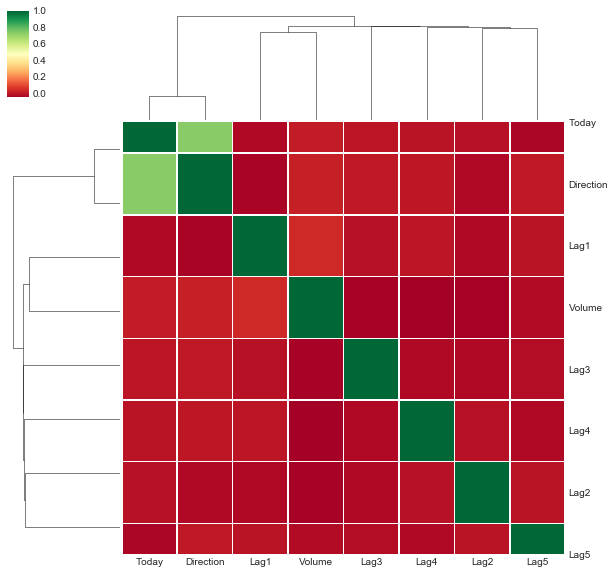

In [7]:
cg = sns.clustermap(df2.corr(), cmap ="RdYlGn", linewidths = 0.5); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 

## Logistic Regression

We can  predict ***Direction*** using ***Lag1*** through ***Lag5*** and ***Volume***. Direction can be encoded as a dummy variable as

$$\text{Direction}=\begin{cases}1, & \mbox{up}, \\0, & \mbox{down}.\end{cases} $$

In [8]:
formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'
model = smf.glm(formula = formula, data=df2, family=sm.families.Binomial())
Results = model.fit()
Results.summary().tables[0]

Dep. Variable:,Direction,No. Observations:,1250
Model:,GLM,Df Residuals:,1243
Model Family:,Binomial,Df Model:,6
Link Function:,logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-863.79
Date:,"Sun, 06 Oct 2019",Deviance:,1727.6
Time:,10:05:32,Pearson chi2:,1.25e+03
No. Iterations:,4,,
Covariance Type:,nonrobust,,


The coefficients:

In [9]:
Results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.1260,0.241,-0.523,0.601,-0.598,0.346
Lag1,-0.0731,0.050,-1.457,0.145,-0.171,0.025
Lag2,-0.0423,0.050,-0.845,0.398,-0.140,0.056
Lag3,0.0111,0.050,0.222,0.824,-0.087,0.109
Lag4,0.0094,0.050,0.187,0.851,-0.089,0.107
Lag5,0.0103,0.050,0.208,0.835,-0.087,0.107
Volume,0.1354,0.158,0.855,0.392,-0.175,0.446


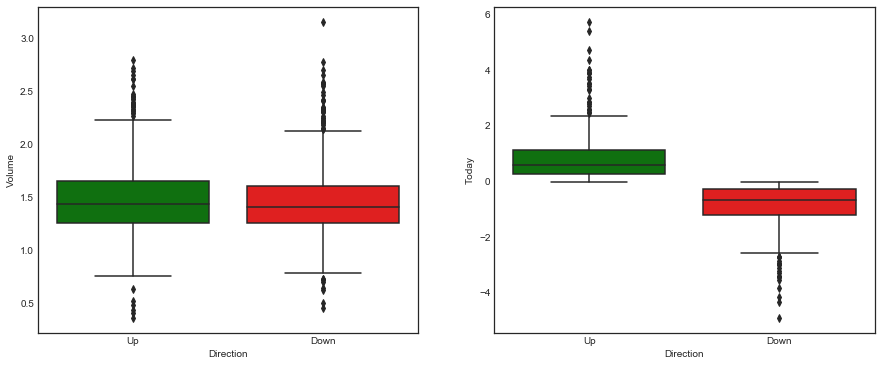

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
sns.boxplot('Direction', 'Volume', data=df, orient='v', ax=ax1,  palette={'Up':'green', 'Down':'Red'});
sns.boxplot('Direction', 'Today', data=df, orient='v', ax=ax2,  palette={'Up':'green', 'Down':'Red'});

## Linear Discriminant Analysis (LDA)

We fit the model using only **Lag1** and **Lag2** from the observations before 2005. Therefore, the train data is defined as follows

In [11]:
# train data
X_train = df[:'2004'][['Lag1','Lag2']]
y_train = df[:'2004']['Direction']

Moreover, the test data consists **Lag1**, **Lag2** and **Direction** from the observations.

In [12]:
# test data
X_test = df['2005':][['Lag1','Lag2']]
y_test = df['2005':]['Direction']

Linear discriminant analysis:

In [13]:
LDA = LinearDiscriminantAnalysis()
LDA

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Predicting the test data using **X_test**

In [14]:
Prediction = LDA.fit(X_train, y_train).predict(X_test)

$π_j$ with $j=1,2$ which denotes the prior probability that an observation belongs to the $k$th class

In [15]:
LDA.priors_

array([0.49198397, 0.50801603])

Here, $\pi_1\approx 0.49$ and $\pi_2\approx 0.50$

Class means:

In [16]:
LDA.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

The coefficients of linear discriminants output provides the linear combination of **Lag1** and **Lag2** that are used to form the LDA decision rule

In [17]:
LDA.coef_

array([[-0.05544078, -0.0443452 ]])

If  $-0.05544078\times Lag1-0.0443452\times Lag2$  is large, then the LDA classifier will predict a market increase, and if it is small, then the LDA classifier will predict a market decline.

A plot that compares the true values and predicted values for Directions in 2005.

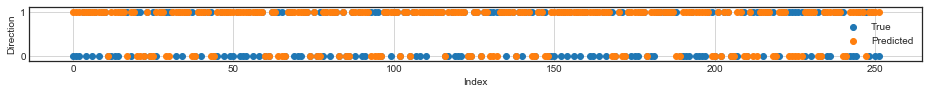

In [18]:
y_true=np.array(df2['2005':]['Direction'])
y_predict=pd.factorize(Prediction,sort=True)[0]
ind=list(range(len(y_predict)))
plt.subplots(figsize = (16, 1))
plt.scatter(ind, y_true, label='True')
plt.scatter(ind, y_predict, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Direction')
plt.legend()
plt.grid()

Confusion Matrix:

In [19]:
temp=confusion_matrix(y_test, Prediction)
conf_matrix=pd.DataFrame({'Up': temp[0,:], 'Down': temp[1,:]})
del temp
conf_matrix.rename(index={0:'Up',1:'Down'}, inplace=True)
conf_matrix

,Up,Down
Up,35,35
Down,76,106


In [20]:
print(classification_report(y_test, Prediction, digits=3))

              precision    recall  f1-score   support

        Down      0.500     0.315     0.387       111
          Up      0.582     0.752     0.656       141

    accuracy                          0.560       252
   macro avg      0.541     0.534     0.522       252
weighted avg      0.546     0.560     0.538       252



The following function, predict() function, provides a list of LDA’s predictions about the movement of the market on the test data. 

In [21]:
Predict_Xtest = LDA.predict_proba(X_test)

A $50\%$ threshold as the posterior probabilities allows us to recreate the predictions:

In [22]:
np.unique(Predict_Xtest[:,1]>0.5, return_counts=True)

(array([False,  True]), array([ 70, 182], dtype=int64))

Moreover, using a $90\%$ threshold as the posterior probabilitie

In [23]:
np.unique(Predict_Xtest[:,1]>0.9, return_counts=True)

(array([False]), array([252], dtype=int64))

This shows that no days in 2005 meet that $90\%$ threshold! In fact, the greatest posterior probability of decrease in all of $2005$ was $52.02\%$.

## Quadratic Discriminant Analysis (QDA)

Now, we implement QDA

In [24]:
QDA = QuadraticDiscriminantAnalysis()
QDA

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

Predicting the test data using X_test

In [25]:
Prediction = QDA.fit(X_train, y_train).predict(X_test)

Class priors:

In [26]:
QDA.priors_

array([0.49198397, 0.50801603])

Class means:

In [27]:
QDA.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

A plot that compares the true values and predicted values for Directions in 2005.

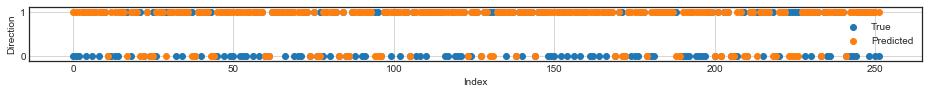

In [28]:
y_predict=pd.factorize(Prediction,sort=True)[0]
ind=list(range(len(y_predict)))
plt.subplots(figsize = (16, 1))
plt.scatter(ind, y_true, label='True')
plt.scatter(ind, y_predict, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Direction')
plt.legend()
plt.grid()

Confusion Matrix:

In [29]:
temp=confusion_matrix(y_test, Prediction)
conf_matrix=pd.DataFrame({'Up': temp[0,:], 'Down': temp[1,:]})
del temp
conf_matrix.rename(index={0:'Up',1:'Down'}, inplace=True)
conf_matrix

,Up,Down
Up,30,20
Down,81,121


In [30]:
print(classification_report(y_test, Prediction, digits=3))

              precision    recall  f1-score   support

        Down      0.600     0.270     0.373       111
          Up      0.599     0.858     0.706       141

    accuracy                          0.599       252
   macro avg      0.600     0.564     0.539       252
weighted avg      0.599     0.599     0.559       252



As can be seen, the QDA predictions are accurate almost $60\%$ of the time, even though the 2005 data were not used to fit the model. For stock market data,  this level of accuracy is quite impressive which is known to be quite hard to model accurately.

This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression. However, it is recommended to evaluate this method’s performance on a larger test set before betting that this approach will consistently beat the market!

## K-Nearest Neighbors (KNN)

### KNN with K=1

In [31]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=1)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Predicting the test data using X_test

A plot that compares the true values and predicted values for Directions in 2005.

In [32]:
Prediction = KNN.fit(X_train, y_train).predict(X_test)

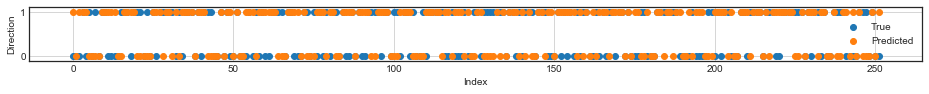

In [33]:
y_predict=pd.factorize(Prediction,sort=True)[0]
ind=list(range(len(y_predict)))
plt.subplots(figsize = (16, 1))
plt.scatter(ind, y_true, label='True')
plt.scatter(ind, y_predict, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Direction')
plt.legend()
plt.grid()

Confusion Matrix:

In [34]:
temp=confusion_matrix(y_test, Prediction)
conf_matrix=pd.DataFrame({'Up': temp[0,:], 'Down': temp[1,:]})
del temp
conf_matrix.rename(index={0:'Up',1:'Down'}, inplace=True)
conf_matrix

,Up,Down
Up,43,58
Down,68,83


In [35]:
print(classification_report(y_test, Prediction, digits=3))

              precision    recall  f1-score   support

        Down      0.426     0.387     0.406       111
          Up      0.550     0.589     0.568       141

    accuracy                          0.500       252
   macro avg      0.488     0.488     0.487       252
weighted avg      0.495     0.500     0.497       252



The results using $K = 1$ are not very good, since only $50\%$ of the observations are correctly predicted.

### KNN with K=3

In [36]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=3)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [37]:
Prediction = KNN.fit(X_train, y_train).predict(X_test)

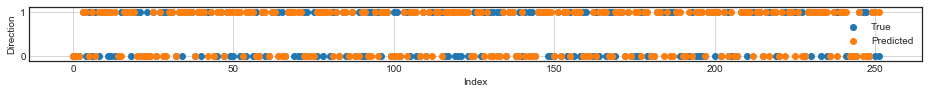

In [38]:
y_predict=pd.factorize(Prediction,sort=True)[0]
ind=list(range(len(y_predict)))
plt.subplots(figsize = (16, 1))
plt.scatter(ind, y_true, label='True')
plt.scatter(ind, y_predict, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Direction')
plt.legend()
plt.grid()

Confusion Matrix:

In [39]:
temp=confusion_matrix(y_test, Prediction)
conf_matrix=pd.DataFrame({'Up': temp[0,:], 'Down': temp[1,:]})
del temp
conf_matrix.rename(index={0:'Up',1:'Down'}, inplace=True)
conf_matrix

,Up,Down
Up,48,55
Down,63,86


In [40]:
print(classification_report(y_test, Prediction, digits=3))

              precision    recall  f1-score   support

        Down      0.466     0.432     0.449       111
          Up      0.577     0.610     0.593       141

    accuracy                          0.532       252
   macro avg      0.522     0.521     0.521       252
weighted avg      0.528     0.532     0.529       252



The results have improved slightly. But increasing K further turns out to provide no further improvements.